In [179]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
%matplotlib inline

# 1.Dataset

In [180]:
dataset=pd.read_csv("Advertising.csv")

In [181]:
dataset.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [182]:
X=dataset.iloc[:, :-1].values
y=dataset.iloc[:, -1].values

In [183]:
X.shape

(200, 3)

In [184]:
X[:10]

array([[230.1,  37.8,  69.2],
       [ 44.5,  39.3,  45.1],
       [ 17.2,  45.9,  69.3],
       [151.5,  41.3,  58.5],
       [180.8,  10.8,  58.4],
       [  8.7,  48.9,  75. ],
       [ 57.5,  32.8,  23.5],
       [120.2,  19.6,  11.6],
       [  8.6,   2.1,   1. ],
       [199.8,   2.6,  21.2]])

In [185]:
X.shape, y.shape

((200, 3), (200,))

In [186]:
y=dataset.iloc[:, -1].values.reshape(200,1)
y.shape

(200, 1)

In [187]:
y[:10]

array([[22.1],
       [10.4],
       [12. ],
       [16.5],
       [17.9],
       [ 7.2],
       [11.8],
       [13.2],
       [ 4.8],
       [15.6]])

# 2.Selection du degree
### Validation croisee

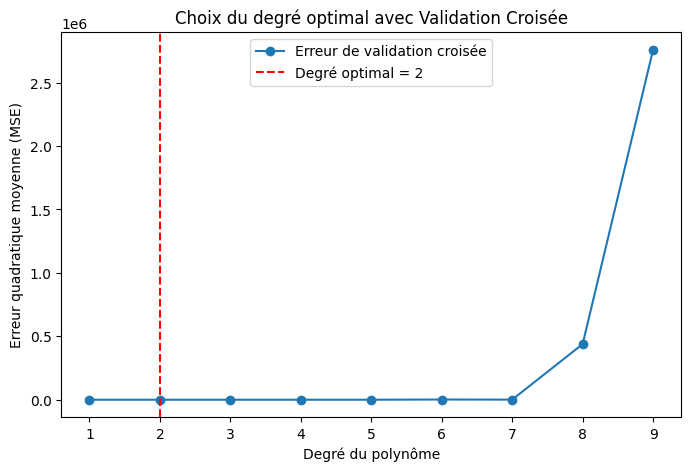

In [188]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
# Séparation des données en jeu d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tester plusieurs degrés sur les données d'entraînement uniquement
degrees = range(1, 10)
cv_errors = []

for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)

    model = LinearRegression()


    # Validation croisée sur l'ensemble d'entraînement
    scores = cross_val_score(model, X_train_poly, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_errors.append(-np.mean(scores))

# Trouver le degré optimal selon la validation croisée
optimal_degree = degrees[np.argmin(cv_errors)]

# Affichage des erreurs de validation croisée
plt.figure(figsize=(8, 5))
plt.plot(degrees, cv_errors, marker='o', label="Erreur de validation croisée")
plt.axvline(optimal_degree, color='red', linestyle='--', label=f"Degré optimal = {optimal_degree}")
plt.xlabel("Degré du polynôme")
plt.ylabel("Erreur quadratique moyenne (MSE)")
plt.title("Choix du degré optimal avec Validation Croisée")
plt.legend()
plt.show()


### BIC

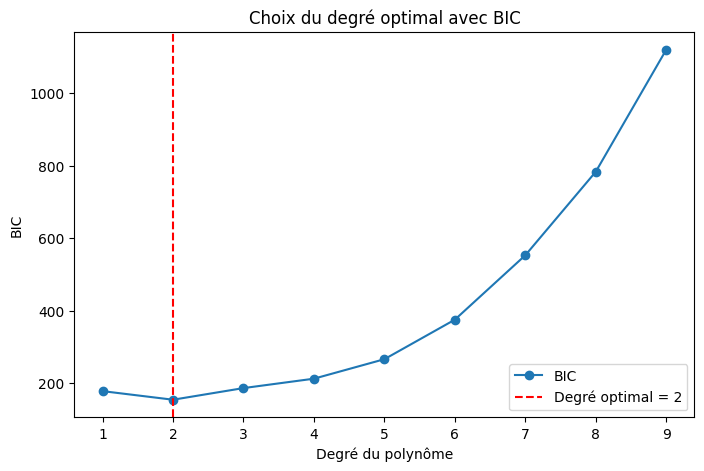

Degré optimal selon le BIC : 2


In [189]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Séparation des données en jeu d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tester plusieurs degrés sur l'ensemble d'entraînement uniquement
degrees = range(1, 10)
bic_values = []

n_train = len(y_train)  # Nombre d'observations dans l'ensemble d'entraînement

for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Prédictions et erreur quadratique moyenne sur l'ensemble d'entraînement
    y_train_pred = model.predict(X_train_poly)
    mse = mean_squared_error(y_train, y_train_pred)

    # Calcul du BIC sur l'ensemble d'entraînement
    k = X_train_poly.shape[1]  # Nombre de paramètres (termes polynomiaux)
    bic = n_train * np.log(mse) + k * np.log(n_train)
    bic_values.append(bic)

# Trouver le degré optimal selon le BIC
optimal_degree_bic = degrees[np.argmin(bic_values)]

# Affichage des valeurs de BIC
plt.figure(figsize=(8, 5))
plt.plot(degrees, bic_values, marker='o', label="BIC")
plt.axvline(optimal_degree_bic, color='red', linestyle='--', label=f"Degré optimal = {optimal_degree_bic}")
plt.xlabel("Degré du polynôme")
plt.ylabel("BIC")
plt.title("Choix du degré optimal avec BIC")
plt.legend()
plt.show()

print(f"Degré optimal selon le BIC : {optimal_degree_bic}")

#### Savoir le nombre de termes
#### degree =2
#### Nombre de variables = 3 (TV, Radio, Journal)
#### Nombre de termes = (n+d)!/n!d! = (3+2)!/3!2! = 10

# 3.Creation de la matrice


In [190]:
# Création de la matrice X, incluant le biais
# x1, x2, x3, x1*x2, x1*x3, x2*x3, x1^2, x2^2, x3^2, 1
x1 = X[:, 0:1]
x2 = X[:, 1:2]
x3 = X[:, 2:3]

X = np.hstack((
    x1, x2, x3,
    x1 * x2, x1 * x3, x2 * x3,
    x1**2, x2**2, x3**2,
))
print(X.shape)
print(X[:10])


(200, 9)
[[2.301000e+02 3.780000e+01 6.920000e+01 8.697780e+03 1.592292e+04
  2.615760e+03 5.294601e+04 1.428840e+03 4.788640e+03]
 [4.450000e+01 3.930000e+01 4.510000e+01 1.748850e+03 2.006950e+03
  1.772430e+03 1.980250e+03 1.544490e+03 2.034010e+03]
 [1.720000e+01 4.590000e+01 6.930000e+01 7.894800e+02 1.191960e+03
  3.180870e+03 2.958400e+02 2.106810e+03 4.802490e+03]
 [1.515000e+02 4.130000e+01 5.850000e+01 6.256950e+03 8.862750e+03
  2.416050e+03 2.295225e+04 1.705690e+03 3.422250e+03]
 [1.808000e+02 1.080000e+01 5.840000e+01 1.952640e+03 1.055872e+04
  6.307200e+02 3.268864e+04 1.166400e+02 3.410560e+03]
 [8.700000e+00 4.890000e+01 7.500000e+01 4.254300e+02 6.525000e+02
  3.667500e+03 7.569000e+01 2.391210e+03 5.625000e+03]
 [5.750000e+01 3.280000e+01 2.350000e+01 1.886000e+03 1.351250e+03
  7.708000e+02 3.306250e+03 1.075840e+03 5.522500e+02]
 [1.202000e+02 1.960000e+01 1.160000e+01 2.355920e+03 1.394320e+03
  2.273600e+02 1.444804e+04 3.841600e+02 1.345600e+02]
 [8.600000e+00 

# 4.Data Split


In [191]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 9)
(40, 9)
(160, 1)
(40, 1)


# 5. Normalisation

In [192]:
def z_score_normalization(data):

    # Calcul des moyennes et des déviations standard de chaque caractéristique
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)

    # Normalisation des données en utilisant la méthode Z-score
    data_normalized = (data - mean) / std

    return data_normalized, mean, std

In [193]:
x_train_norm, mean,std=z_score_normalization(x_train)
x_train_norm

array([[-0.40424839, -1.02823707, -0.33767538, ..., -0.6344003 ,
        -0.93748644, -0.48921405],
       [ 0.32060772, -0.91982774, -1.16143931, ...,  0.06847389,
        -0.90008756, -0.80055117],
       [-1.27051084,  0.2591237 ,  0.25425079, ..., -1.09051897,
        -0.03881329, -0.04785031],
       ...,
       [ 0.80424121,  0.71986334,  1.43317042, ...,  0.70021868,
         0.5240399 ,  1.37343067],
       [ 0.1851428 , -0.87239866, -0.60897488, ..., -0.08511944,
        -0.88151187, -0.63067922],
       [ 1.54692165, -0.86562307, -0.42153159, ...,  1.92399567,
        -0.8787482 , -0.53702213]])

In [194]:
x_train_norm.mean()

np.float64(-9.86864910777917e-18)

In [195]:
x_test_norm, mean,std=z_score_normalization(x_test)


In [196]:
x_test_norm.mean()

np.float64(-1.4802973661668754e-17)

# 6.Colonne des 1 'Biais'


In [197]:
#Ajout de la colonne des 1
x_train_norm1 = np.hstack((np.ones((x_train_norm.shape[0], 1)), x_train_norm))
x_test_norm1 = np.hstack((np.ones((x_test_norm.shape[0], 1)), x_test_norm))
x_train_norm.shape, x_test_norm.shape

((160, 9), (40, 9))

In [198]:
theta  = np.random.randn(x_train_norm1.shape[1], 1)
theta

array([[ 1.410262  ],
       [-0.1860437 ],
       [-0.80724597],
       [ 1.45160943],
       [-0.14858858],
       [-0.48683057],
       [ 0.85143936],
       [ 1.74120046],
       [ 0.60693999],
       [-1.54952783]])

# 7.Modele de regression


In [199]:
def model(X, theta):
    return X.dot(theta)

# 8. Fonction cout


In [200]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)



In [201]:
cost_function(x_train_norm1, y_train ,theta)

np.float64(106.09042260645829)

# 9.Entrainement


In [202]:
#La fonction de gradient
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [203]:
# La fonction de la descente du gradient
def gradient_descent(X, y, theta, learning_rate, n_iterations):

    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du coût du modèle

    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise a jour du paramétre theta (formule de la descente de gradient descent)
        cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du coût à l'itération i dans cost_history[i]

    return theta, cost_history

In [204]:
#Entrainement
n_iterations = 5000
learning_rate = 0.1
theta_final, cost_history = gradient_descent(x_train_norm1, y_train, theta, learning_rate, n_iterations)



In [205]:
theta_final

array([[15.330625  ],
       [ 6.41396701],
       [-0.47204178],
       [-0.0389286 ],
       [ 1.38577943],
       [-0.11930873],
       [ 0.14675952],
       [-2.69052626],
       [ 1.05326583],
       [ 0.13492386]])

# 10.Courbe d'apprentissage


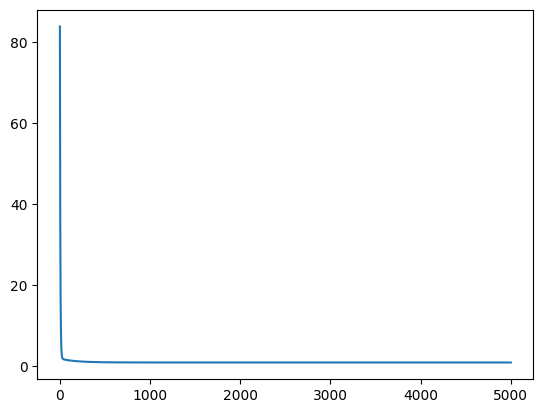

In [206]:
plt.plot(range(n_iterations), cost_history)
plt.show()

# 11.Evaluation du modele


In [207]:
# Evaluation du modèle
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

coef_determination(y_test, model(x_test_norm1,theta_final))

np.float64(0.923320318226625)

# Test de Overfiting

### Normalement on calcul l ecart entre l erreur de d'entrainement et de test si l'ecart est large on aura un overfiting d'ou on doit faire :

#### 1- Regularisation LASSO

In [208]:
def cost_function_regul(X, y, theta,a):
  m = len(y)
  return 1/(2*m) * np.sum((model(X, theta) - y)**2) + a/m * np.linalg.norm(theta, ord=1)



In [209]:
cost_function_regul(x_train_norm1, y_train ,theta, 1)

np.float64(106.14817065576766)

In [210]:
def grad_reg(X, y, theta,a):
  m = len(y)
  return 1/m * X.T.dot(model(X, theta) - y) + a/m * theta *np.sign(theta)

In [211]:
# La fonction de la descente du gradient
def gradient_descent_reg(X, y, theta, learning_rate, n_iterations):

    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du coût du modèle

    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad_reg(X, y, theta,1) # mise a jour du paramétre theta (formule de la descente de gradient descent)
        cost_history[i] = cost_function_regul(X, y, theta,1) # on enregistre la valeur du coût à l'itération i dans cost_history[i]

    return theta, cost_history

In [212]:
#Entrainement
n_iterations = 5000
learning_rate = 0.1
theta_final_reg, cost_history_reg = gradient_descent_reg(x_train_norm1, y_train, theta, learning_rate, n_iterations)



In [213]:
theta_final

array([[15.330625  ],
       [ 6.41396701],
       [-0.47204178],
       [-0.0389286 ],
       [ 1.38577943],
       [-0.11930873],
       [ 0.14675952],
       [-2.69052626],
       [ 1.05326583],
       [ 0.13492386]])

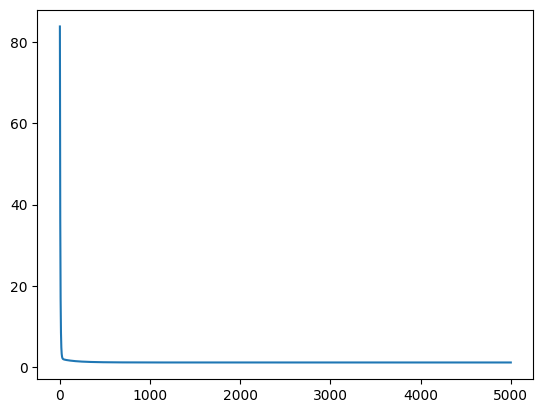

In [214]:
plt.plot(range(n_iterations), cost_history_reg)
plt.show()

In [215]:
# Evaluation du modèle
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

coef_determination(y_test, model(x_test_norm1,theta_final_reg))

np.float64(0.9275400867283321)

#### 2- Regularisation RIDGE

In [216]:
def cost_function_regul2(X, y, theta,a):
  m = len(y)
  return 1/(2*m) * np.sum((model(X, theta) - y)**2) + a/(2*m) * np.sum(theta[0:len(theta)-1]**2)

In [217]:
def grad_reg2(X, y, theta,a):
  m = len(y)
  return 1/m * X.T.dot(model(X, theta) - y) + a/m * theta

In [218]:
def gradient_descent_reg(X, y, theta, learning_rate, n_iterations):

    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du coût du modèle

    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad_reg2(X, y, theta,1) # mise a jour du paramétre theta (formule de la descente de gradient descent)
        cost_history[i] = cost_function_regul2(X, y, theta,1) # on enregistre la valeur du coût à l'itération i dans cost_history[i]

    return theta, cost_history

In [219]:
#Entrainement
n_iterations = 5000
learning_rate = 0.1
theta_final_reg2, cost_history_reg2 = gradient_descent_reg(x_train_norm1, y_train, theta, learning_rate, n_iterations)

theta_final_reg2

array([[ 1.52354037e+01],
       [ 5.57757113e+00],
       [-3.01204002e-01],
       [-1.46500497e-02],
       [ 1.39663527e+00],
       [ 7.03527264e-03],
       [ 1.51858950e-01],
       [-1.93837320e+00],
       [ 8.65999715e-01],
       [-5.22497134e-04]])

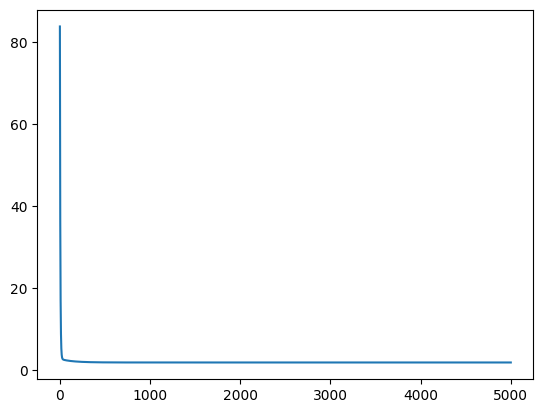

In [220]:
plt.plot(range(n_iterations), cost_history_reg2)
plt.show()

In [221]:
# Evaluation du modèle
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

coef_determination(y_test, model(x_test_norm1,theta_final_reg2))

np.float64(0.9252833712001124)

#### 3- Comparaison de resultats
On remarque qu'on a pas d'Overfiting
Le nombre d'observations est peut-être suffisant par rapport aux features

Les variables sont probablement déjà pertinentes